In [167]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/Raum27/mc/main/play_tennis.csv"
df = pd.read_csv(url)

In [168]:
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [169]:
df.shape

(14, 6)

In [170]:
df[:][:14]

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [171]:
df.dtypes

day         object
outlook     object
temp        object
humidity    object
wind        object
play        object
dtype: object

In [172]:
df.isnull().sum()

day         0
outlook     0
temp        0
humidity    0
wind        0
play        0
dtype: int64

In [173]:
col = ['day']
df.drop(col,axis=1, inplace = True)
df.head()

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [174]:
x = df.iloc[:,:-1]
y = df.play

In [175]:
print(x)

     outlook  temp humidity    wind
0      Sunny   Hot     High    Weak
1      Sunny   Hot     High  Strong
2   Overcast   Hot     High    Weak
3       Rain  Mild     High    Weak
4       Rain  Cool   Normal    Weak
5       Rain  Cool   Normal  Strong
6   Overcast  Cool   Normal  Strong
7      Sunny  Mild     High    Weak
8      Sunny  Cool   Normal    Weak
9       Rain  Mild   Normal    Weak
10     Sunny  Mild   Normal  Strong
11  Overcast  Mild     High  Strong
12  Overcast   Hot   Normal    Weak
13      Rain  Mild     High  Strong


In [176]:
from sklearn.preprocessing import LabelEncoder
def lablelEncode(data, columns):
    for i in columns:
        #print('hhhhhhhhhhhhhhh')
        lb = LabelEncoder().fit_transform(data[i])
        #print('PPPPPPPPPPPPP')
        data[i+'_'] = lb
columns = ['outlook','temp','humidity','wind']
lablelEncode(df, columns)

In [177]:
y_le = LabelEncoder()
y = y_le.fit_transform(df.play)
df['play_'] = y
df

,outlook,temp,humidity,wind,play,outlook_,temp_,humidity_,wind_,play_
0,Sunny,Hot,High,Weak,No,2,1,0,1,0
1,Sunny,Hot,High,Strong,No,2,1,0,0,0
2,Overcast,Hot,High,Weak,Yes,0,1,0,1,1
3,Rain,Mild,High,Weak,Yes,1,2,0,1,1
4,Rain,Cool,Normal,Weak,Yes,1,0,1,1,1
5,Rain,Cool,Normal,Strong,No,1,0,1,0,0
6,Overcast,Cool,Normal,Strong,Yes,0,0,1,0,1
7,Sunny,Mild,High,Weak,No,2,2,0,1,0
8,Sunny,Cool,Normal,Weak,Yes,2,0,1,1,1
9,Rain,Mild,Normal,Weak,Yes,1,2,1,1,1


In [178]:
x = df.iloc[:,5:-1]
x[:]

,outlook_,temp_,humidity_,wind_
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [179]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier = DecisionTreeClassifier()

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
model = DecisionTreeClassifier.fit(X_train,y_train)

In [181]:
y_hat = model.predict(X_test)

In [182]:
print(y_hat) # 0 same 'No' 1 same 'yes'

[1 0 1 0 0]


In [183]:
print(y_test)

[1 0 1 1 1]


In [184]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [185]:
print(accuracy_score(y_test,y_hat))
print(precision_score(y_test,y_hat))
print(recall_score(y_test,y_hat))
print(f1_score(y_test,y_hat))

0.6
1.0
0.5
0.6666666666666666


In [186]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_hat)

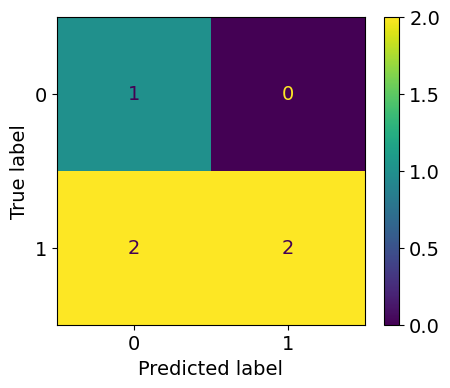

In [191]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()